In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.8.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 3s 1us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images.shape


(60000, 28, 28)

In [5]:
len(train_labels)


60000

In [6]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape


(10000, 28, 28)

In [8]:
len(test_labels)


10000

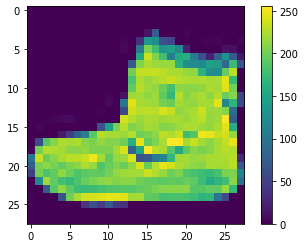

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0


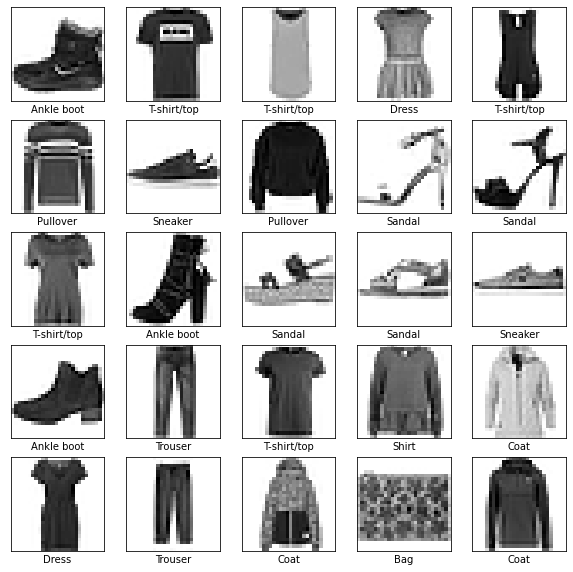

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])


In [14]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4961 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3752 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3384 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3112 - accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2797 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2594 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2490 - accuracy: 0.9053
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.241

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3351 - accuracy: 0.8821 - 538ms/epoch - 2ms/step

Test accuracy: 0.882099986076355


In [16]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])


In [17]:
predictions = probability_model.predict(test_images)


In [18]:
predictions[0]


array([3.3390681e-06, 2.1366200e-10, 3.3383007e-08, 1.5576040e-14,
       4.4205226e-08, 3.5211772e-03, 7.0318564e-09, 9.8616211e-03,
       8.8156234e-08, 9.8661369e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])


9

In [20]:
test_labels[0]


9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


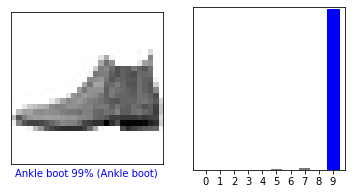

In [22]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


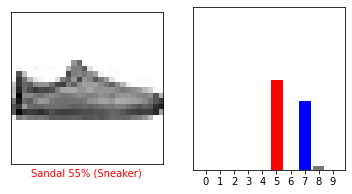

In [23]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


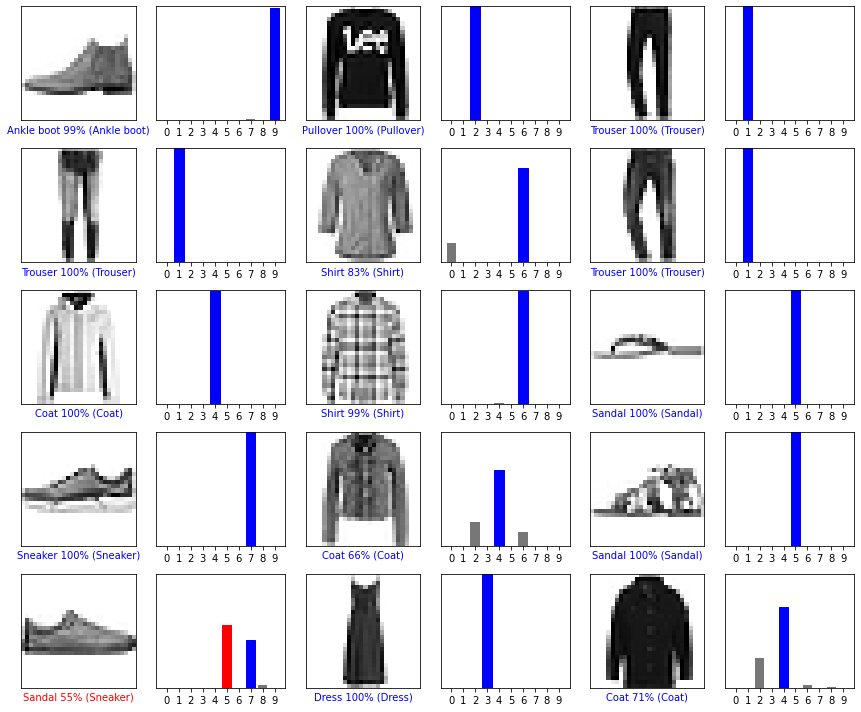

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)


(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)


[[2.7605645e-06 8.0395463e-15 9.9993432e-01 6.2762798e-12 3.6732694e-05
  5.5086779e-15 2.6213222e-05 1.6942948e-15 5.5679106e-10 2.7950294e-15]]


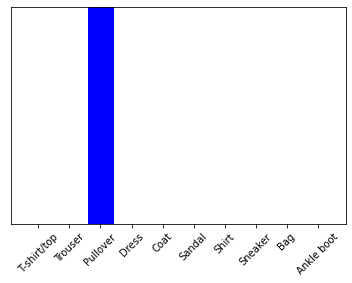

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [29]:
np.argmax(predictions_single[0])


2